## Импорты

In [1]:
import mne
import neurokit2 as nk
import numpy as np
import pandas as pd
import pickle
import sklearn as sk
from sklearn.linear_model import LinearRegression

from helper import MicrostateHelperWrapper as MSHW
from helper import Folders

## Константы

In [2]:
# sampling_rate = 2048

raw_data_folder_path = "./raw_data/"
preprocessed_data_folder_path = "./preprocessed_data/"
save_data_folder_path = "./save_data/"
images_folder_path = "./images/"
statistics_folder_path = "statistics/"
mhw_objects_folder_path = "mhw_objects/"

folders = Folders(
    end_folder = "",
    raw_data = raw_data_folder_path,
    preprocessed_data = preprocessed_data_folder_path,
    save_data = save_data_folder_path,
    images = images_folder_path,
    statistics=statistics_folder_path,
    mhw_objects=mhw_objects_folder_path
)


filenames014 = [
    "ACP_INP0014_REST1_1pnt_1vis",
    "ACP_INP0014_REST2_1pnt_1vis",
    "ACP_INP0014_REST3_1pnt_1vis",
    "ACP_INP0014_REST1_1pnt_2vis",
    "ACP_INP0014_REST2_1pnt_2vis",
    "ACP_INP0014_REST3_1pnt_2vis"
]
path014 = "rest_14/"

filenames019 = [
    "INP0019_v1.4_REST1_R003_R003_08.11.23",
    "INP0019_v1.4_REST2_R003_R003_08.11.23",
    "INP0019_v1.4_REST3_R003_R003_08.11.23",
    "INP0019_v1.5_REST2_Op005_Op007_08.12.23",
    "INP0019_v1.5_REST3_Op005_Op007_08.12.23",
]
path019 = preprocessed_data_folder_path + "rest_19/"

filenames036 = [
    "INP0036_v1.4_REST1_Op008_Op011_11.12.23",
    "INP0036_v1.4_REST2_Op008_Op011_11.12.23",
    "INP0036_v1.4_REST3_Op008_Op011_11.12.23",
    "INP0036_v1.5_REST1_Op005_Op010_12.12.23",
    "INP0036_v1.5_REST2_Op005_Op010_12.12.23",
    "INP0036_v1.5_REST3_Op005_Op010_12.12.23",
]
path036 = preprocessed_data_folder_path + "rest_36/"

filenames045 = [
    "INP0045_v1.4_REST1_R003_R003_08.11.23",
    "INP0045_v1.4_REST2_R003_R003_08.11.23",
    "INP0045_v1.4_REST3_R003_R003_08.11.23",
    "INP0045_v1.5_rs11_Op005_Op008_Op011_17.11.23",
    "INP0045_v1.5_rs22_Op005_Op008_Op011_17.11.23",
    "INP0045_v1.5_rs23_Op005_Op008_Op011_17.11.23",
]
path045 = preprocessed_data_folder_path + "rest_45/"

filenames064 = [
    "INP0064_v1.4_rs11_S008_R003_04.12.23",
    "INP0064_v1.4_rs12_Op008_R003_04.12.23",
    "INP0064_v1.4_rs13_Op008_R003_04.12.23",
    "INP0064_v1.5_rs21_Op005_Op006_Op008_05.12.23",
    "INP0064_v1.5_rs22_Op009_A002_13.12.23",
    "INP0064_v1.5_rs23_Op009_A002_13.12.23",
]
path064 = preprocessed_data_folder_path + "rest_64/"

# MICROSTATES

## Meaned mean

In [3]:
# mean_vals = pd.DataFrame()
# current_dataset = "64"
# 
# for filen in filenames064:
#     # filename = 'save_data/ms_event_splited_statistics/dynamic/mean/'+filen+'_th_mean.csv'
#     filename = 'save_data/ms_event_splited_statistics/dynamic/'+filen+'_th.csv'
#     print("Reading file", filename)
#     df = pd.read_csv(filename)
#     df["File"] = filen
#     mean_vals = pd.concat([mean_vals, df])

In [4]:
# mean_vals.drop('Unnamed: 0', axis=1, inplace=True)
# mean_vals = drop_self_to_self(4, mean_vals)

In [5]:
# mean_vals

In [6]:
# def mean_by_event(df):
#     clone = df.copy()
#     return clone.groupby('Event').mean()

In [7]:
# def mean_by_transition_raw_stats(df):
#     clone = df.copy()
#     # clone.drop('Event', axis=1, inplace=True)
#     clone.reset_index(drop=True, inplace=True)
#     clone.set_index(['File', 'Event', 'Order'], inplace=True)
#     return clone.T.mean().to_frame()

In [8]:
# def mean_by_transition(df):
#     clone = df.copy()
#     # clone.drop('Event', axis=1, inplace=True)
#     clone.reset_index(drop=True, inplace=True)
#     clone.set_index(['File', 'Event'], inplace=True)
#     return clone.T.mean().to_frame()


In [9]:
# mbt = mean_by_transition_raw_stats(mean_vals)

In [10]:
# mbt

In [11]:
# mbtr = mbt.reset_index()
# opened = mbtr[mbtr['Event'] == 'Opened'].copy()
# closed = mbtr[mbtr['Event'] == 'Closed']
# opened['Opened'] = opened[0]
# opened.drop(0, axis=1, inplace=True)
# # opened['Closed'] = closed
# opened.drop('Event', axis=1, inplace=True)
# opened.drop('File', axis=1, inplace=True)
# opened.drop('Order', axis=1, inplace=True)
# merged = opened.reset_index()
# merged.drop('index', axis=1, inplace=True)
# 
# # for i in range(abs(len(merged['Opened'].values) - len(closed[0].values))):
# #     # merged = merged.sort_index()
# merged['Closed'] = closed[0].values[:len(merged['Opened'].values)]
# merged

In [12]:
# mbtr.to_csv('./save_data/ms_event_splited_statistics/dynamic/mean/by_transition/'+current_dataset+'.csv')

In [13]:
# merged.plot()

In [14]:
# merged.to_csv('./save_data/ms_event_splited_statistics/dynamic/mean/by_transition/'+current_dataset+'_merge.csv')


In [15]:
# mean_vals

In [16]:
# mvi = mean_vals.drop(['Order', 'File'], axis=1)
# mvf = mean_vals.drop(['Order', 'Event'], axis=1)
# mvi

In [17]:
# meaned_mean = mean_by_event(mvi)

In [18]:
# meaned_file = mvf.groupby('File').mean()

In [19]:
# meaned_file.T.mean()

In [20]:
# meaned_mean

In [21]:
# meaned_mean.T.mean()

In [22]:
# meaned_mean.to_csv('./save_data/ms_event_splited_statistics/dynamic/mean/meaned_mean/'+current_dataset+'.csv')

## Logistic regression

In [23]:
# mean_vals = pd.DataFrame()
# 
# full_filelist = [filenames014, filenames019, filenames036, filenames045, filenames064]
# full_dataset = ['14', '19', '36', '45']
# 
# mode = "file"
# 
# from sklearn.preprocessing import StandardScaler
# 
# # for filelist in full_filelist:
# #     for filen in filelist:
# #         filename = 'save_data/ms_event_splited_statistics/dynamic/' + filen + '_th.csv'
# #         # print("Reading file", filename)
# #         df = pd.read_csv(filename)
# #         df["File"] = filen
# #         mean_vals = pd.concat([mean_vals, df])
# 
# X_vals = np.array([]).reshape(0, 12)
# y_vals = np.array([])
# 
# for filelist in full_filelist:
#     for filen in filelist:
#         filename = 'save_data/ms_event_splited_statistics/dynamic/' + filen + '_th.csv'
#         # print("Reading file", filename)
#         df = pd.read_csv(filename)
#         vals = df.drop(['Event', 'Order', 'Unnamed: 0'], axis=1)
#         vals = drop_self_to_self(4, vals)
#         scaler = StandardScaler()
#         scaler.fit(vals)
#         normal_vals = scaler.transform(vals)
#         on_append = np.array(normal_vals)
#         X_vals = np.append(X_vals, on_append, axis=0)
#         y_vals = np.append(y_vals, np.array(df['Event']), axis=0)
# 
# 
# 
# 
# # for dataset_name in full_dataset:
# #     filename = 'save_data/ms_event_splited_statistics/dynamic/mean/by_transition/' + dataset_name + '.csv'
# #     df = pd.read_csv(filename)
# #     df["File"] = filen
# #     mean_vals = pd.concat([mean_vals, df])
# 
# # if 'Unnamed: 0' in mean_vals:
# #     mean_vals.drop('Unnamed: 0', axis=1, inplace=True)
# # if mode == "file":
# #     mean_vals = drop_self_to_self(4, mean_vals)
# # data = X_vals
# # data.drop(['Order', 'File'], axis=1, inplace=True)
# 
# # X_vals = np.ndarray(X_vals).shape
# # y_vals = np.array(y_vals).shape
# # X_vals = np.array(X_vals)
# X_vals.shape, y_vals.shape

In [24]:
# test0 = np.array([]).reshape(0, 4)
# test1 = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
# test2 = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
# test0 = np.append(test0, test1, axis=0)
# test0 = np.append(test0, test2, axis=0)
# test0

In [25]:
# normalize
# mbtr
# vals = data.drop(['Event', 'File', 'Order'], axis=1)
# scaler = StandardScaler()
# scaler.fit(vals)
# normal_vals = scaler.transform(vals)

In [26]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix
# 
# # X = normal_vals
# # y = data['Event']
# X = X_vals
# y = y_vals
# 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # print(X_train.shape, X_test.shape, len(y_train), len(y_test))

In [27]:
# from sklearn.metrics import classification_report
# 
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
# print("Acc:", accuracy_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
# test_pred_value_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# print(classification_report(y_test, y_pred))

## Windowing logreg on realtime data

### Testing on data that was not used in training

In [28]:

# all_y_real = np.array([])
# all_y_pred = np.array([])
# for i in range(5):
#     filename = filenames064[i]+'_th'
#     dynamic_th = load_or_calc_ms_dynamic_event_splited_ms(
#         filename = filename
#     )
#     y_real = dynamic_th['Event']
#     all_y_real = np.append(all_y_real, y_real, axis=0)
#     dynamic_th_dropped = drop_self_to_self(4, dynamic_th).drop(['Order', 'Event'], axis=1)
#     X = scaler.transform(dynamic_th_dropped)
#     y_pred = logreg.predict(X)
#     all_y_pred = np.append(all_y_pred, y_pred, axis=0)
#     print(f"----{filename}----\nAcc:", accuracy_score(y_real, y_pred))
# 
# print("-----------------------TOTAL-----------------------")
# print("Acc:", accuracy_score(all_y_real, all_y_pred))
# print(confusion_matrix(all_y_real, all_y_pred))
# print(classification_report(all_y_real, all_y_pred))

### Realtime

In [29]:
# import time
# filepath = path064
# filename = filenames064[5]
# raw, microstates = load_or_calc_raw_ms(filepath, filename)
# ms_thresholded = apply_basic_switch_threshold(microstates, threshold=0.02)

In [30]:
# length = ms_thresholded['Sequence'].shape[0]

In [31]:
# preds = []
# start = time.time()
# for i in range(((sampling_rate*10) + 1), length):
#     if(i % 2048 != 0):
#         continue
#     # print(f"Checking event: ", i/sampling_rate)
#     ms_copy = split_ms_sequence(ms_thresholded, start_sample=i-(sampling_rate*10), end_sample=i+1)
#     dynamic_stats = nk.microstates_dynamic(ms_copy, show=False)
#     ms_copy_dropped = drop_self_to_self(4, dynamic_stats)
#     X = scaler.transform(ms_copy_dropped)
#     y_pred = logreg.predict(X)
#     preds.append(y_pred[0])
#     # print(f"----{filename}----\nPrediction:", y_pred)
# 
# print("Time:", time.time() - start)

| Window | Recalc segment | Time |
|--------|----------------|------|
| 5s     | 200ms          | 82s  |
| 5s     | 500ms          | 33s  |
| 5s     | 1s             | 17s  |
| 10s    | 1s             | 32s  | 

## Calculation of mean vals

In [32]:
filename = filenames014[0]
filepath = path014
folders.end_folder = filepath

In [33]:
raw: mne.io.Raw = mne.io.read_raw_eeglab(folders.preprocessed_data + folders.end_folder + filename + '.set')

/var/folders/tt/nr_wg20d5q13z6kxlpj2xsyc0000gn/T/ipykernel_36608/1688923764.py:1: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw: mne.io.Raw = mne.io.read_raw_eeglab(folders.preprocessed_data + folders.end_folder + filename + '.set')
/var/folders/tt/nr_wg20d5q13z6kxlpj2xsyc0000gn/T/ipykernel_36608/1688923764.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw: mne.io.Raw = mne.io.read_raw_eeglab(folders.preprocessed_data + folders.end_folder + filename + '.set')


In [34]:
mshw = MSHW(
    raw = raw,
    raw_filename = filename,
    folders = folders
)

In [35]:
if mshw.check_saved():
    mshw = mshw.load()
else:
    mshw.calc_raw_ms().save()

Loading MHW object ACP_INP0014_REST1_1pnt_1vis


In [36]:
print(mshw.ms['GEV'])

0.5716063188678515


In [37]:
mshwt = MSHW(
    raw = raw,
    raw_filename = filename+'_th',
    folders = folders
)
if mshwt.check_saved():
    mshwt = mshwt.load()
else:
    mshwt = mshw.apply_basic_switch_threshold(threshold=0.02, inplace=False)
    mshwt.raw_filename = filename+'_th'
    mshwt.save()

Loading MHW object ACP_INP0014_REST1_1pnt_1vis_th


,Microstate_0_Proportion,Microstate_1_Proportion,Microstate_2_Proportion,Microstate_3_Proportion,Microstate_0_LifetimeDistribution,Microstate_1_LifetimeDistribution,Microstate_2_LifetimeDistribution,Microstate_3_LifetimeDistribution,Microstate_0_DurationMean,Microstate_0_DurationMedian,Microstate_1_DurationMean,Microstate_1_DurationMedian,Microstate_2_DurationMean,Microstate_2_DurationMedian,Microstate_3_DurationMean,Microstate_3_DurationMedian,Microstate_Average_DurationMean,Microstate_Average_DurationMedian
0,0.228863,0.249934,0.251399,0.269803,2077.5,2097.5,1977.5,2176.5,0.111617,0.089,0.120732,0.096,0.128807,0.097,0.1256,0.098,0.121648,0.095


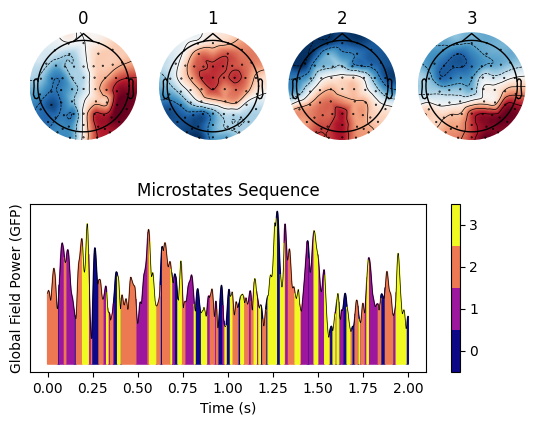

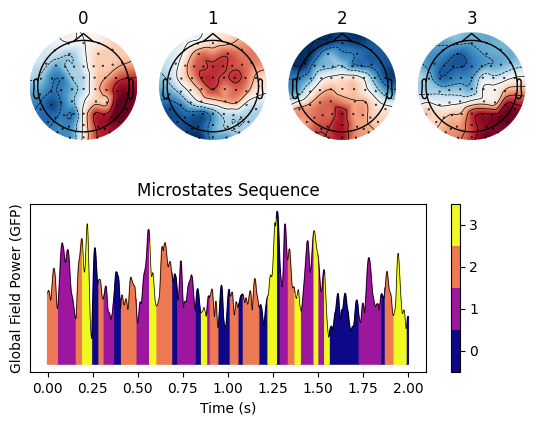

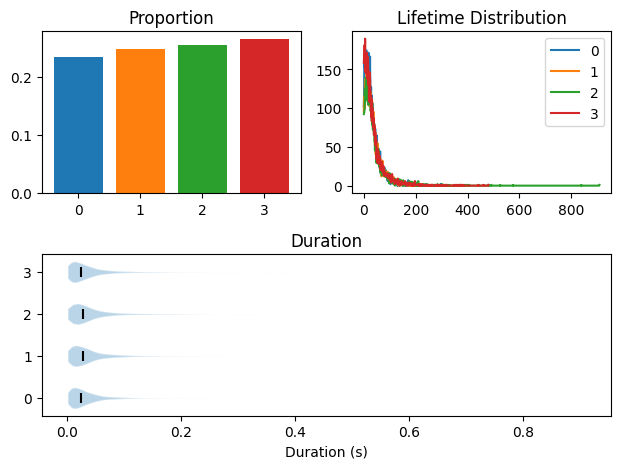

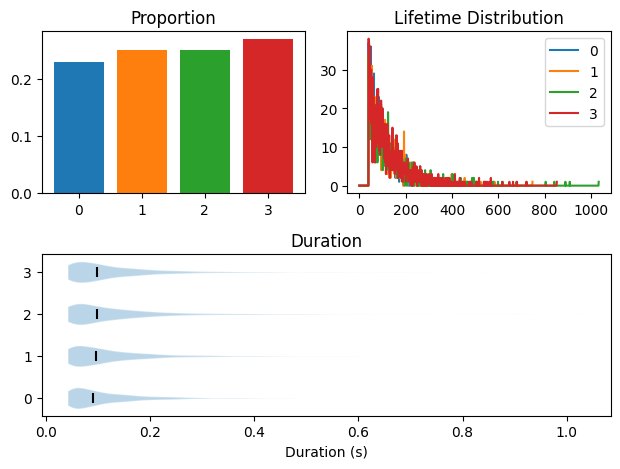

In [38]:
nk.microstates_plot(mshw.ms, epoch = (0, 2048*2))
nk.microstates_plot(mshwt.ms, epoch = (0, 2048*2))
nk.microstates_static(mshw.ms, show=True)
nk.microstates_static(mshwt.ms, show=True)

In [39]:
transitions = [['s11', ['s2', 's3', 's4']], ['s4', ['s2', 's3', 's11']]]
# transitions = [['s11', ['s2', 's3']], ['s12', ['s2', 's3']]] # 14 - d1
# transitions = [['s11', ['s3']], ['s12', ['s3']]] 

key_names = ['s11', 's2', 's3', 's4']
# key_names = ['s11', 's12', 's2', 's3'] # 14 - d1
# key_names = ['s11', 's12', 's3', 's1'] # 14 - d1

key_namings = {'s11': "Closed", 's4': "Opened"}
# key_namings = {'s11': "Closed", 's12': "Opened"}


print(mshw.get_event_bounds_by_event_transitions(key_names, key_namings, transitions))

Used Annotations descriptions: ['Impedance', 'boundary', 's1', 's11', 's2', 's3', 's4']
('Impedance', 1)
('boundary', 2)
('s1', 3)
('s11', 4)
('s2', 5)
('s3', 6)
('s4', 7)
Event too short, skipping 2085 [324016, 7] [326101, 6]
([[330236, 391701], [395835, 457300], [461435, 527034], [527034, 588500], [592635, 654100], [658234, 719700], [723835, 789434], [789434, 850900], [855035, 920634], [920634, 982100]], [4, 7, 4, 7, 4, 7, 4, 7, 4, 7], {4: 'Closed', 7: 'Opened'})


In [40]:
mshw.split_ms_sequence_by_events(
    key_names = key_names,
    key_namings = key_namings,
    transitions = transitions
)
mshwt.split_ms_sequence_by_events(
    key_names = key_names,
    key_namings = key_namings,
    transitions = transitions
)

Calculating microstates split...
Used Annotations descriptions: ['Impedance', 'boundary', 's1', 's11', 's2', 's3', 's4']
('Impedance', 1)
('boundary', 2)
('s1', 3)
('s11', 4)
('s2', 5)
('s3', 6)
('s4', 7)
Event too short, skipping 2085 [324016, 7] [326101, 6]
Splitted by events
Calculating microstates split...
Used Annotations descriptions: ['Impedance', 'boundary', 's1', 's11', 's2', 's3', 's4']
('Impedance', 1)
('boundary', 2)
('s1', 3)
('s11', 4)
('s2', 5)
('s3', 6)
('s4', 7)
Event too short, skipping 2085 [324016, 7] [326101, 6]
Splitted by events


In [41]:
(mshw
    .split_dynamic_calc_statistics()
    .split_dynamic_drop_self_to_self()
    .split_dynamic_save_statistics()
    .save()
)
(mshwt
    .split_dynamic_calc_statistics()
    .split_dynamic_drop_self_to_self()
    .split_dynamic_save_statistics()
    .save()
)

Event:  Closed
Event:  Opened
Event:  Closed
Event:  Opened
Event:  Closed
Event:  Opened
Event:  Closed
Event:  Opened
Event:  Closed
Event:  Opened
Calculated dynamic statistics
Dropped self-to-self transitions
Saved dynamic statistics
Saving MHW object ACP_INP0014_REST1_1pnt_1vis
Event:  Closed
Event:  Opened
Event:  Closed
Event:  Opened
Event:  Closed
Event:  Opened
Event:  Closed
Event:  Opened
Event:  Closed
Event:  Opened
Calculated dynamic statistics
Dropped self-to-self transitions
Saved dynamic statistics
Saving MHW object ACP_INP0014_REST1_1pnt_1vis_th


In [42]:
def mean_by_event(df):
    clone = df.copy()
    clone.drop('Order', axis=1, inplace=True)
    return clone.groupby('Event').mean()

In [43]:
mean = mean_by_event(mshw.split_dynamic_statistics)
mean_th = mean_by_event(mshwt.split_dynamic_statistics)

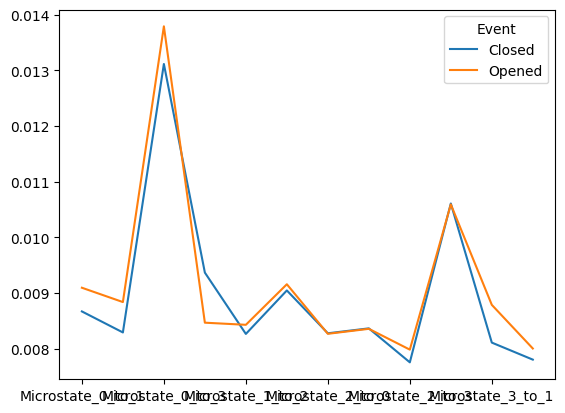

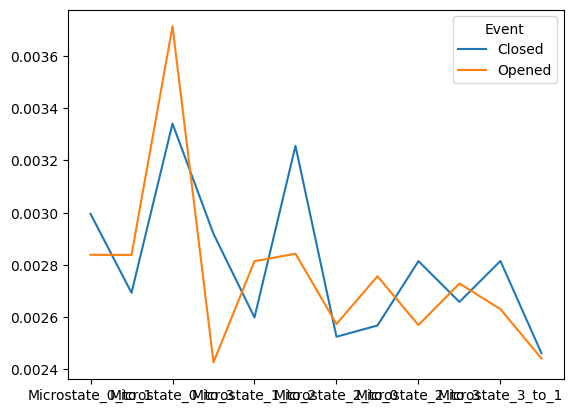

In [44]:
mean.T.plot()
mean_th.T.plot()
mean.to_csv('./save_data/ms_event_splited_statistics/dynamic/mean/'+filename+'_mean.csv')
mean_th.to_csv('./save_data/ms_event_splited_statistics/dynamic/mean/'+filename+'_th_mean.csv')

In [122]:
# ms.plot_maps(maps, raw_bv_reconst_reref.info) 
# nk.microstates_plot(microstates, epoch = (0, 2048*10))
# ms.plot_segmentation(segmentation[:2048], raw_bv_reconst_reref.get_data()[:, :2048], raw_bv_reconst_reref.times[:2048])
# nk.microstates_static(microstates, sampling_rate=sampling_rate, show=True)
# nk.microstates_dynamic(microstates, show=True)
# gfp = nk.eeg_gfp(raw_resample)
# 
# peaks = nk.microstates_peaks(raw_resample, gfp=gfp)
# 
# # Plot the peaks in the first 200 data points
# nk.events_plot(events = peaks[peaks < int(2048/2)], signal = gfp[0:int(2048/2)])